ADF检验结果:
 |    |   Period |   ADF Statistic |   p-value |   1% Critical |   5% Critical | Stationary   |
|---:|---------:|----------------:|----------:|--------------:|--------------:|:-------------|
|  0 |     4451 |        -45.1909 |         0 |        -3.432 |        -2.862 | True         |
|  1 |     4450 |        -11.1698 |         0 |        -3.432 |        -2.862 | True         |
|  2 |     4449 |        -10.7104 |         0 |        -3.432 |        -2.862 | True         |
|  3 |     4448 |        -10.8121 |         0 |        -3.432 |        -2.862 | True         |
|  4 |     4447 |        -10.0358 |         0 |        -3.432 |        -2.862 | True         |


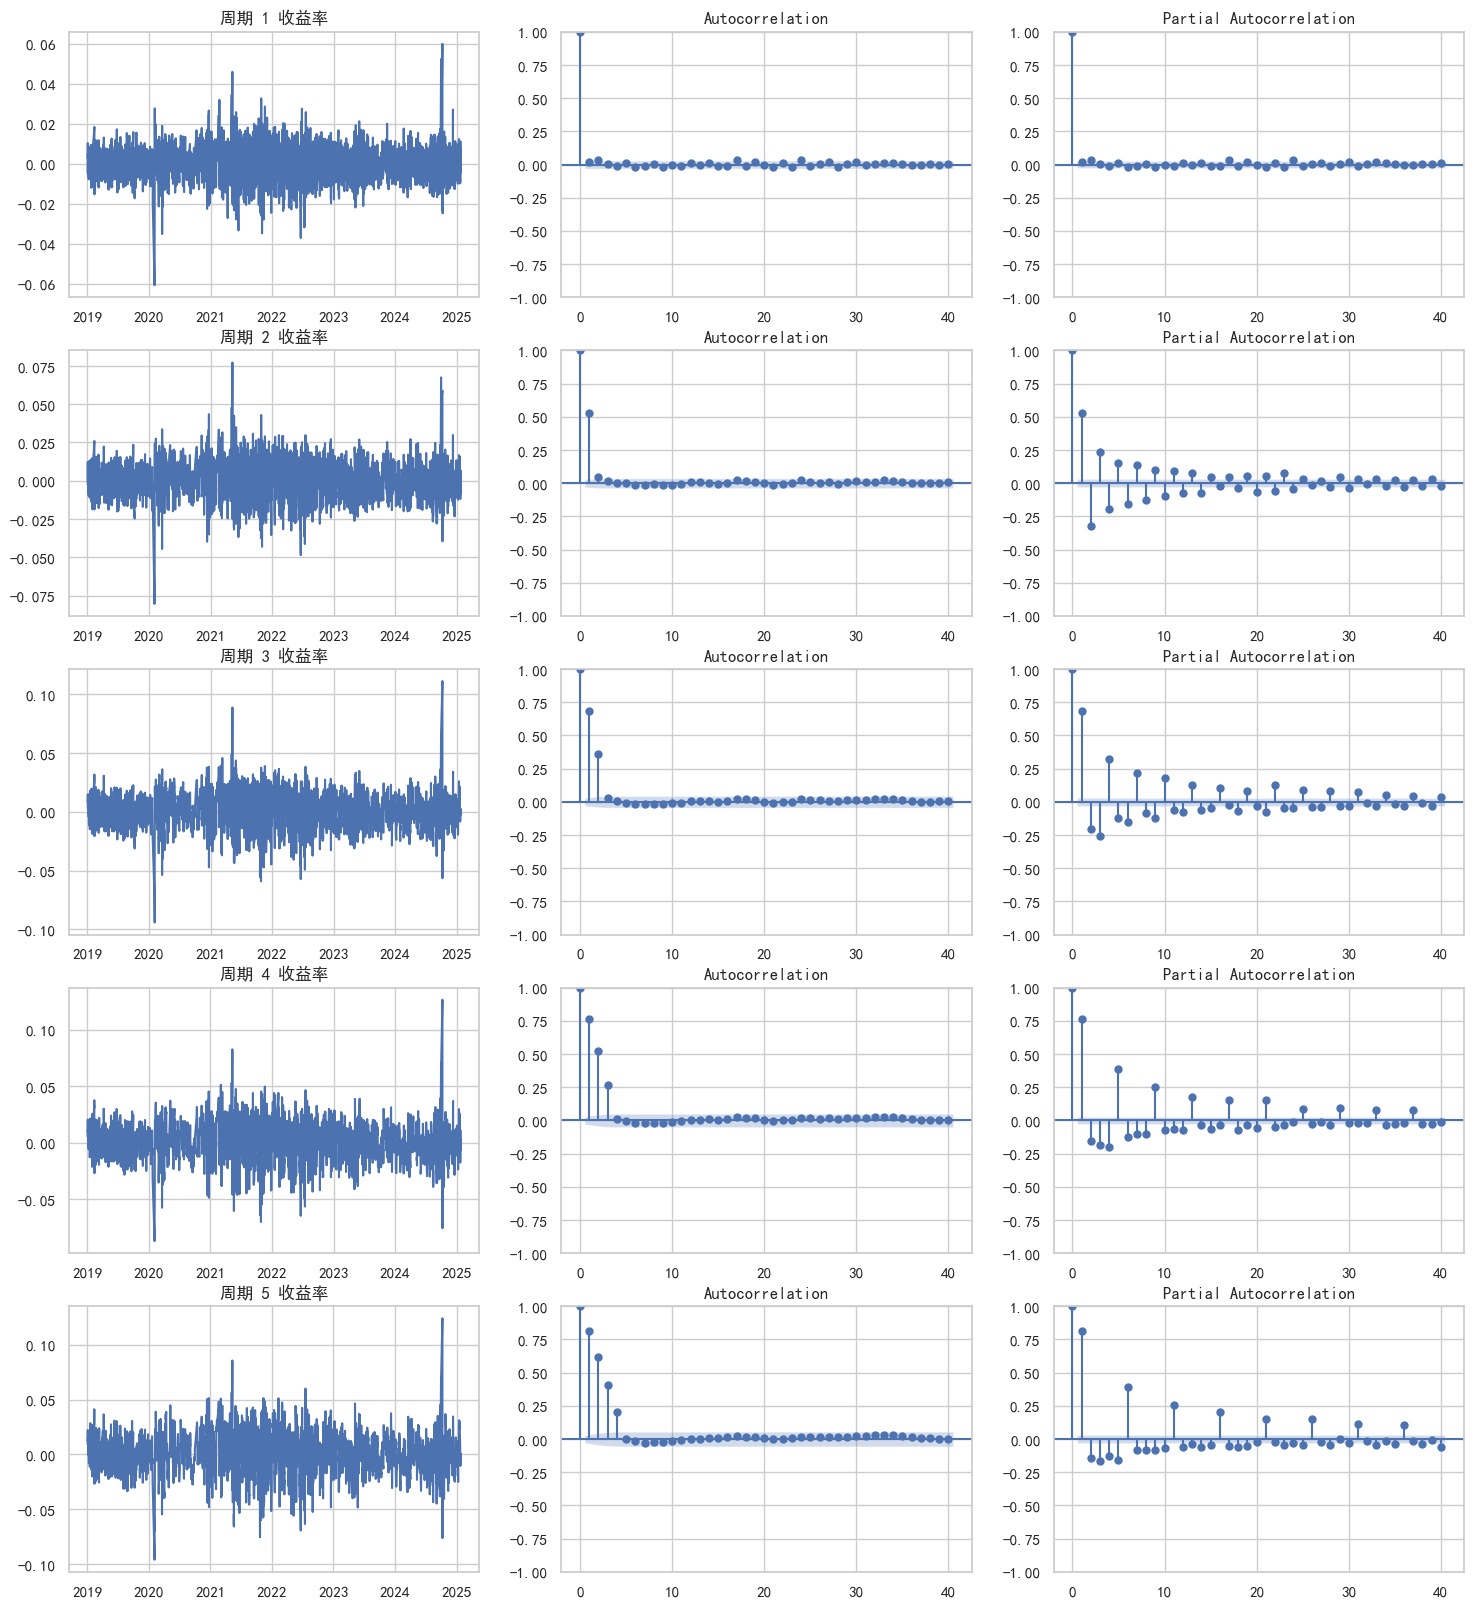

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats


sns.set_theme(style='whitegrid')
plt.rcParams["font.family"] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False
FIG_SIZE = (18, 20)
SAMPLE_SIZE = 10000

def load_data(file_path):

    df = pd.read_csv(file_path, parse_dates=['datetime'])
    df.set_index("datetime", inplace=True)
    return df.dropna()


###  计算对数收益率

def calculate_returns(price_series, max_period=5):

    return [np.log(price_series).diff(periods=p).dropna() 
            for p in range(1, max_period+1)]



### ADF单位根检验

def adf_test(series, signif=0.05):

    result = adfuller(series, autolag='AIC')
    return {
        'Period': len(series),
        'ADF Statistic': round(result[0], 4),
        'p-value': round(result[1], 6),
        '1% Critical': round(result[4]['1%'], 3),
        '5% Critical': round(result[4]['5%'], 3),
        'Stationary': result[1] < signif
    }


def analyze_returns(returns_list, periods):

    ### 平稳性检验
    
    results = [adf_test(ret) for ret in returns_list]
    result_df = pd.DataFrame(results)
    print("ADF检验结果:\n", result_df.to_markdown())
    
    ### 可视化
    
    plt.figure(figsize=FIG_SIZE)
    for i, (period, returns) in enumerate(zip(periods, returns_list), 1):
        
        ###  时序图
        plt.subplot(len(periods), 3, (i-1)*3 + 1)
        plt.plot(returns)
        plt.title(f'周期 {period} 收益率')
        plt.grid(True)
        
        ### ACF/PACF
        plt.subplot(len(periods), 3, (i-1)*3 + 2)
        plot_acf(returns, lags=40, ax=plt.gca())
        plt.subplot(len(periods), 3, (i-1)*3 + 3)
        plot_pacf(returns, lags=40, ax=plt.gca(), method='ywm')
    

### 数据文件

data = load_data('RB99_1m_Turnover_31000_4452_591.csv')
returns = calculate_returns(data['close'])
analyze_returns(returns, periods=range(1,6))
